## Rotten Tomatoes movies Analysis

## Overview

The main objective of this analysis was to determine whether or not the audience scores and critic scores were fairly close to each other or not. A simple machine learning model 
was also used to determing whether or not scores could accurately be predicted based on small subset of features.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./rotten_tomatoes_movies.csv",header=0)

In [3]:
df.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,8/25/2018,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2/11/2020,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,10/23/2020,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,3/27/2017,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139041 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23001 non-null   object 
 15  

In [5]:
#convert date columns to apprpriate type
df['releaseDateTheaters'] = pd.to_datetime(df['releaseDateTheaters'],errors='coerce')
df['releaseDateStreaming'] = pd.to_datetime(df['releaseDateStreaming'],errors='coerce')

#create release year columns for theatres and streaming
df['releaseYearTheaters'] = df['releaseDateTheaters'].dt.year

df['releaseYearStreaming'] = df['releaseDateStreaming'].dt.year

#replace null values
df['title'] = df['title'].fillna('no title')

In [6]:
# mean audience score
mean_audienescore = df['audienceScore'].mean().round()

# mean tomatoMeter score
mean_tmscore = df['tomatoMeter'].mean().round()

#replace empty audience score values with the average mean audience score
df['audienceScore'] = df['audienceScore'].fillna(mean_audienescore)

#replace empty tomatoMeter values with the average mean tm score
df['tomatoMeter'] = df['tomatoMeter'].fillna(mean_tmscore)

In [7]:
#replace empty rating values with the most common maturity rating
df['rating'] = df['rating'].fillna('PG-13')

#replace empty rating values with the most common maturity rating
df['ratingContents'] = df['ratingContents'].fillna('not described')

In [8]:
# mean runtimeMinutes
mean_runtimeMinutes = df['runtimeMinutes'].mean()
df['runtimeMinutes'] = df['runtimeMinutes'].fillna(mean_runtimeMinutes)

In [9]:
df['genre'] = df['genre'].fillna('genre not listed')

df['originalLanguage'] = df['originalLanguage'].fillna('original language not listed')

df['director'] = df['director'].fillna('director(s) not listed')

df['writer'] = df['writer'].fillna('writer(s) not listed')

In [10]:
#if the movie has a null value for theatre release, I will replace it with string : "not released ''"
df['releaseDateTheaters'] = df['releaseDateTheaters'].fillna('not released in theatres')

#The same for streamed movies
df['releaseDateStreaming'] = df['releaseDateStreaming'].fillna('not released for streaming')

#replace null values in box office with 0, indicating it was not release in theatres
df['boxOffice'] = df['boxOffice'].fillna('0')

In [11]:
#replace null values for distributer
df['distributor'] = df['distributor'].fillna('not distributer')


#replace null values for soundMix
df['soundMix'] = df['soundMix'].fillna('not mixed')

In [12]:
#cleaned and imputated data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         143258 non-null  float64
 3   tomatoMeter           143258 non-null  float64
 4   rating                143258 non-null  object 
 5   ratingContents        143258 non-null  object 
 6   releaseDateTheaters   143258 non-null  object 
 7   releaseDateStreaming  143258 non-null  object 
 8   runtimeMinutes        143258 non-null  float64
 9   genre                 143258 non-null  object 
 10  originalLanguage      143258 non-null  object 
 11  director              143258 non-null  object 
 12  writer                143258 non-null  object 
 13  boxOffice             143258 non-null  object 
 14  distributor           143258 non-null  object 
 15  

<Axes: xlabel='audienceScore', ylabel='tomatoMeter'>

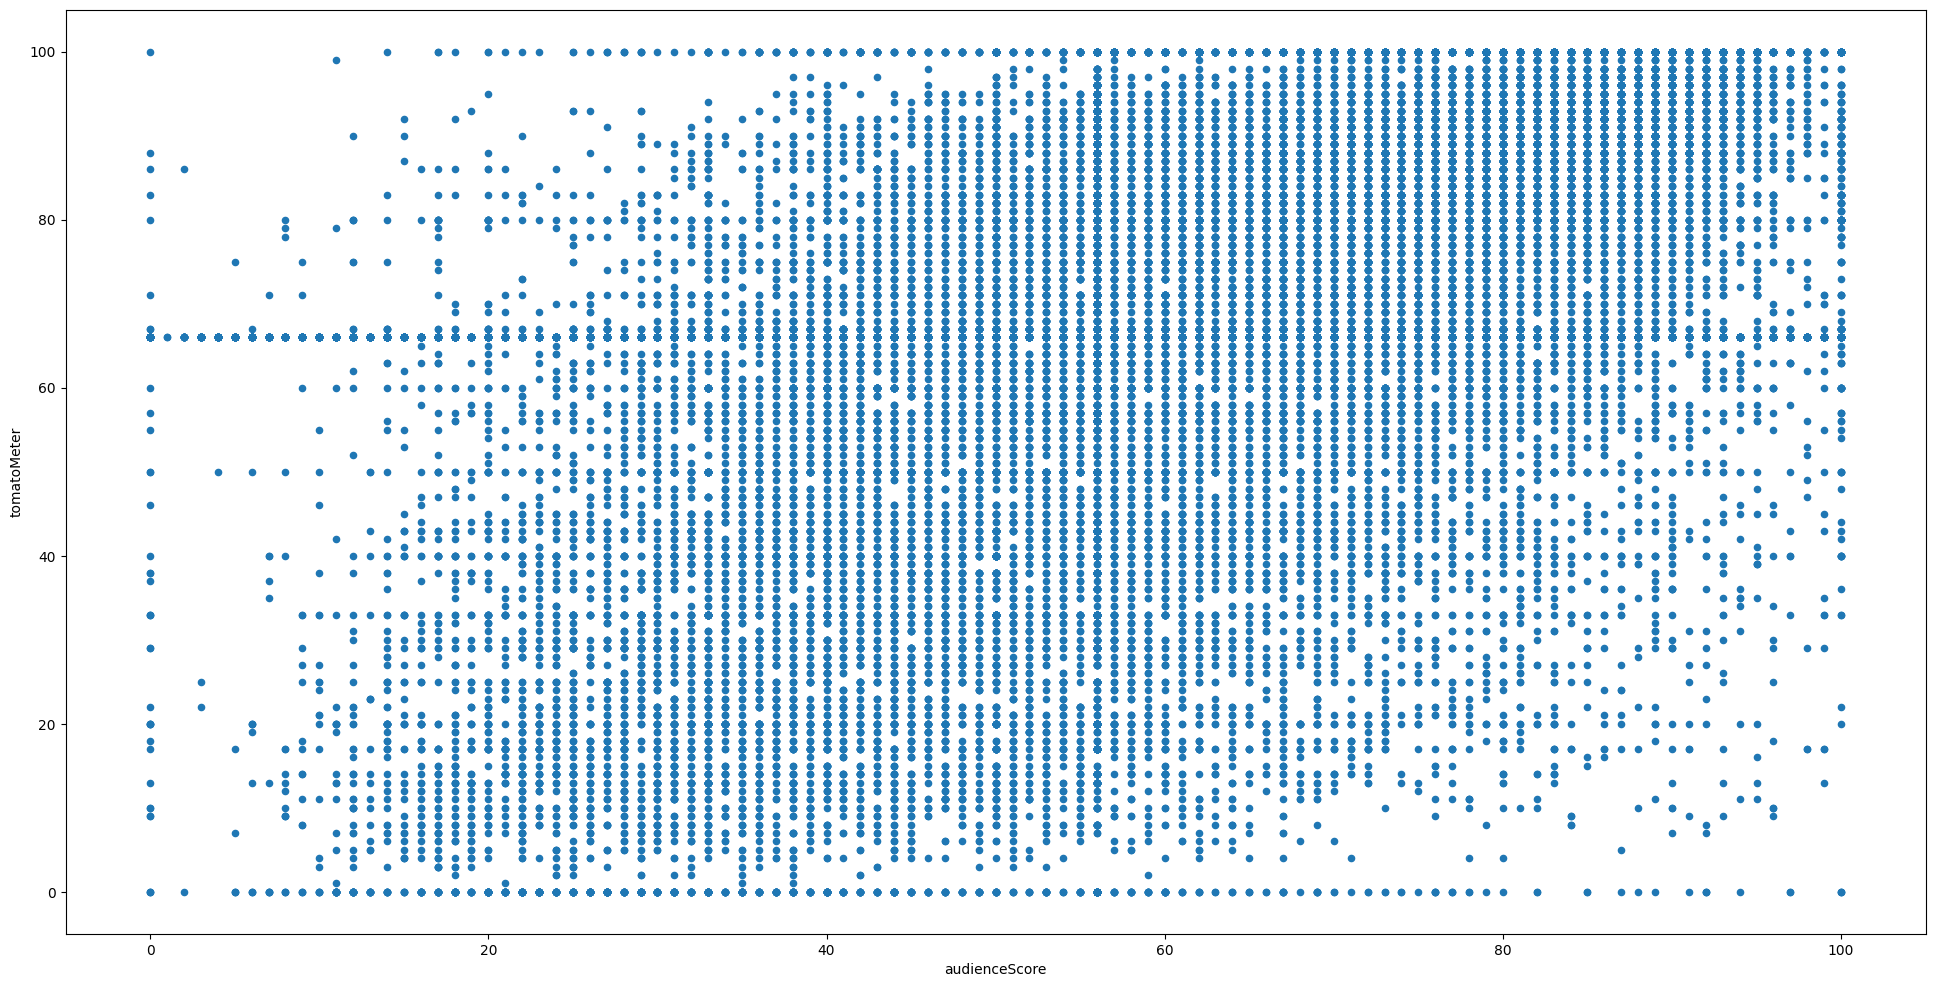

In [13]:
# lets explore the relationship between critic reviews and audience score
df_scores = df[['audienceScore','tomatoMeter']]
df_scores
df_scores.plot(kind='scatter',x='audienceScore',y='tomatoMeter',figsize=(24,12))

the plot suggests that there isn't a strong agreement between critics and audiences. While some movies are well-received by both, there are plenty of instances where critics and audiences diverge significantly in their opinions.

In [14]:
#correaltion between the two scores
df_scores.corr(method='pearson')

,audienceScore,tomatoMeter
audienceScore,1.00000,0.30357
tomatoMeter,0.30357,1.00000


In [15]:
# bar graph representing the number of movies in cinemas across the years
years_df = df['releaseYearTheaters']
years_df = years_df.dropna()
years_df = years_df.astype(int)
years_df = years_df.sort_values(ascending=False)
movie_counts = years_df.value_counts()

<Axes: xlabel='releaseYearTheaters'>

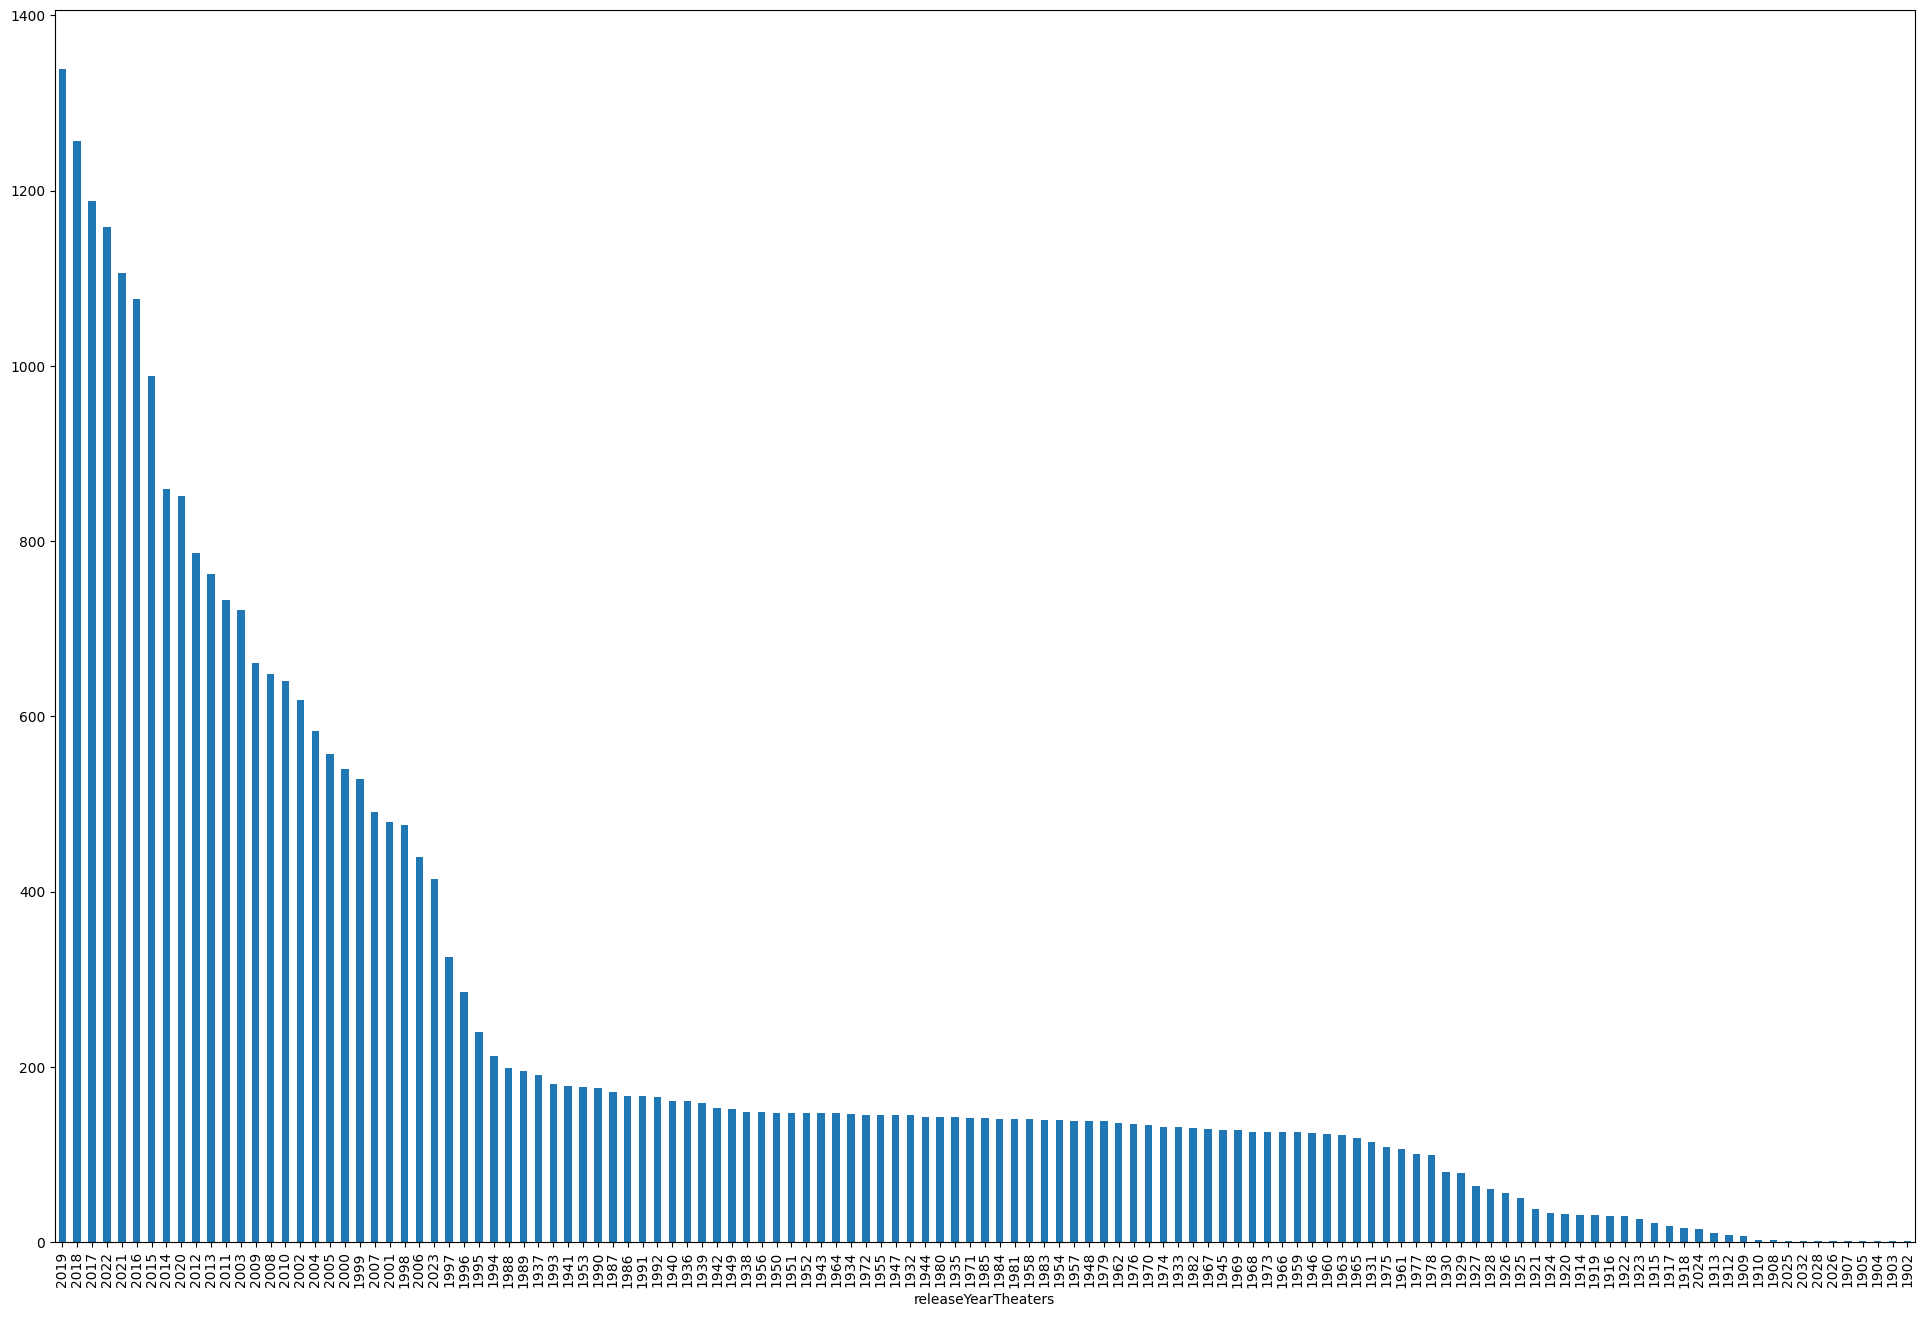

In [16]:
movie_counts.plot(kind='bar',x='YEAR',figsize=(24,16))

In [17]:
# bar graph representing the number of streamed movies across the years
stream_years_df = df['releaseYearStreaming']
stream_years_df = stream_years_df.dropna()
stream_years_df = stream_years_df.astype(int)
stream_years_df = stream_years_df.sort_values(ascending=False)
stream_counts = stream_years_df.value_counts()

<Axes: xlabel='releaseYearStreaming'>

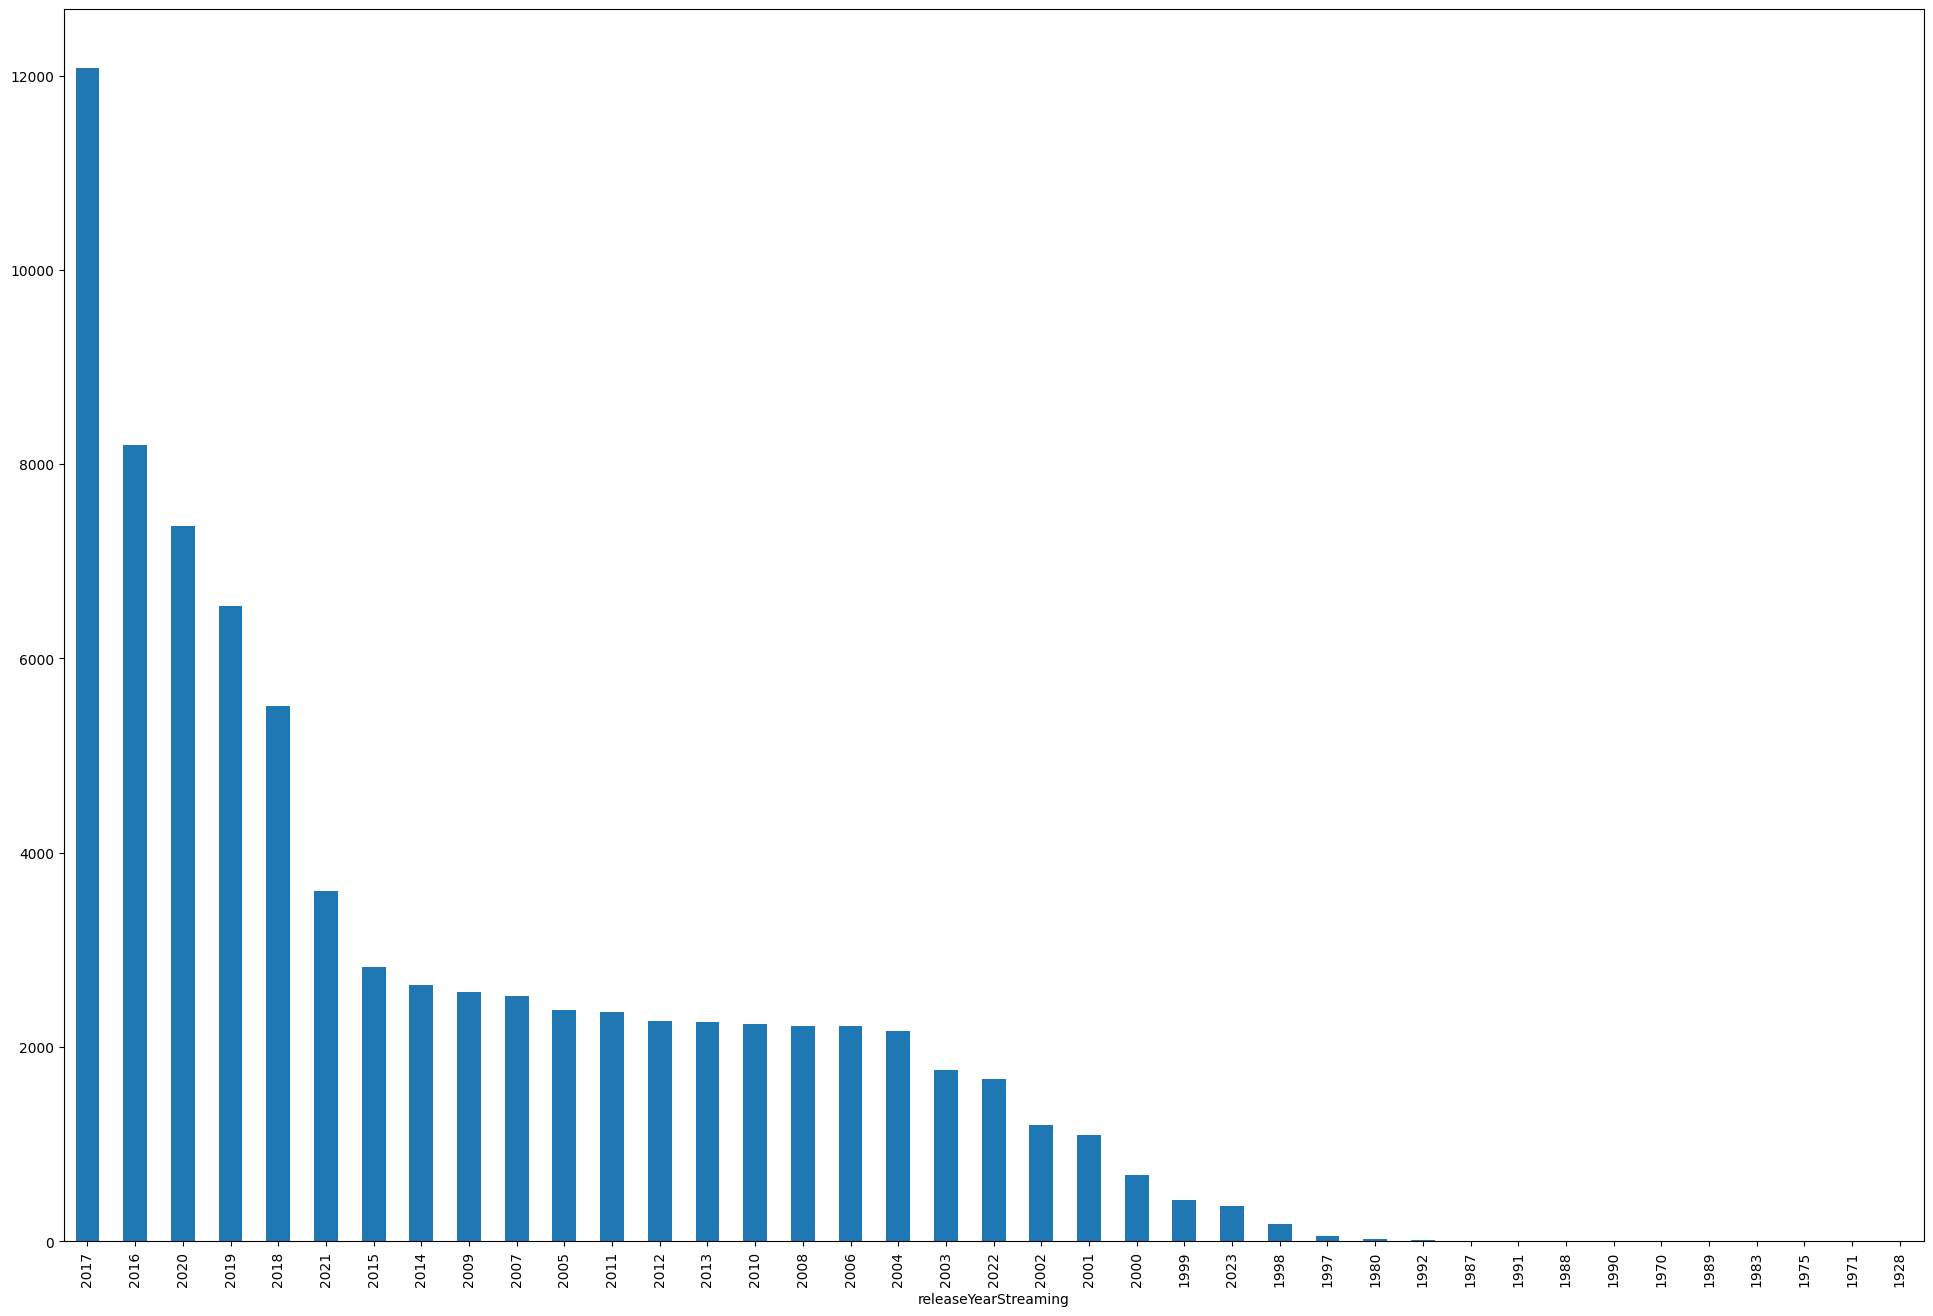

In [18]:
stream_counts.plot(kind='bar',x='YEAR',figsize=(24,16))

In [19]:
#top 10 movies by audience , released in theaters 
released_in_theaters = df['releaseDateTheaters'] !='not released in theatres'
df[released_in_theaters].sort_values('audienceScore',ascending=False).head(10)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,releaseYearTheaters,releaseYearStreaming
21740,bad_axe,Bad Axe,100.0,96.0,PG-13,not described,2022-11-18 00:00:00,2022-11-18 00:00:00,102.0,Documentary,English,David Siev,writer(s) not listed,$20.0K,IFC Films,not mixed,2022.0,2022.0
21531,vijayanand,Vijayanand,100.0,66.0,PG-13,not described,2022-12-09 00:00:00,not released for streaming,150.0,"Drama, Biography",Kannada,Rishika Sharma,writer(s) not listed,0,VRL Film Productions,not mixed,2022.0,NaN
97072,cuando_los_hijos_se_van,Cuando los hijos se van,100.0,66.0,PG-13,not described,1943-05-21 00:00:00,not released for streaming,139.0,Drama,Spanish,Juan Bustillo Oro,writer(s) not listed,0,not distributer,not mixed,1943.0,NaN
132791,bring_your_own_brigade,Bring Your Own Brigade,100.0,89.0,R,['Language'],2021-08-06 00:00:00,not released for streaming,127.0,Documentary,English,Lucy Walker,Lucy Walker,$8.3K,CBSN Films,not mixed,2021.0,NaN
42904,the_sparring_partner,The Sparring Partner,100.0,100.0,PG-13,not described,2022-12-09 00:00:00,not released for streaming,135.0,"Crime, Drama, Mystery & thriller",Chinese,Cheuk Tin Ho,"Frankie Tam,Oliver Yip,Thomas Leung",0,Well Go USA Entertainment,not mixed,2022.0,NaN
61403,cyrano_my_love,"Cyrano, My Love",100.0,81.0,R,['Brief Sexual Content'],2019-10-18 00:00:00,2020-01-14 00:00:00,110.0,"Comedy, Drama",French (France),Alexis Michalik,Alexis Michalik,$350.3K,Roadside Attractions,not mixed,2019.0,2020.0
36540,brothers_keeper_2021,Brother's Keeper,100.0,100.0,PG-13,not described,2022-10-21 00:00:00,not released for streaming,85.0,"Drama, Mystery & thriller",English,Ferit Karahan,"Ferit Karahan,Gülistan Acet",0,Altered Innocence,not mixed,2022.0,NaN
67913,an_la_minute,An L.A. Minute,100.0,22.0,R,['Sexual Content and Language'],2018-08-24 00:00:00,not released for streaming,86.0,Comedy,English,Daniel Adams,"Larry ""Ratso"" Sloman,Daniel Adams",$2.8K,Strand Releasing,not mixed,2018.0,NaN
94702,left_on_purpose,Left on Purpose,100.0,89.0,PG-13,not described,2017-02-10 00:00:00,2017-02-10 00:00:00,95.0,"Documentary, Biography, Drama",English,Justin Schein,Susan Korda,0,FilmBuff,not mixed,2017.0,2017.0
45768,the_chicken_curry,The Chicken Curry,100.0,66.0,PG-13,not described,2021-06-11 00:00:00,not released for streaming,92.0,"Comedy, Drama",Kannada,Abhilash Shetty,Abhilash Shetty,0,not distributer,Dolby Digital,2021.0,NaN


In [20]:
#top 10 movies by audience , released in theaters 
released_in_theaters = df['releaseDateTheaters'] !='not released in theatres'
df[released_in_theaters].sort_values('tomatoMeter',ascending=False).head(10)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,releaseYearTheaters,releaseYearStreaming
143123,missing_in_brooks_county,Missing in Brooks County,56.0,100.0,PG-13,not described,2021-08-20 00:00:00,2021-08-20 00:00:00,81.0,Documentary,English,"Lisa Molomot,Jeff Bemiss",writer(s) not listed,0,Self Distributed,not mixed,2021.0,2021.0
102921,kill_zone_2_2016,SPL 2: A Time for Consequences,63.0,100.0,PG-13,not described,2016-05-13 00:00:00,2016-07-19 00:00:00,120.0,"Action, Mystery & thriller",Chinese,Pou-Soi Cheang,"Lai-yin Leung,Ying Wong",0,Well Go USA,not mixed,2016.0,2016.0
102959,a_german_youth,A German Youth,56.0,100.0,PG-13,not described,2019-10-11 00:00:00,not released for streaming,93.0,Documentary,French (France),Jean-Gabriel Périot,"Pierre Hodgson,Anne Steiner,Nicole Brenez,Anne...",$2.3K,Big World Pictures,not mixed,2019.0,NaN
103018,blind_husbands,Blind Husbands,71.0,100.0,PG-13,not described,1919-10-21 00:00:00,2016-08-11 00:00:00,68.0,Drama,original language not listed,Erich von Stroheim,Erich von Stroheim,0,Universal Film Manufacturing Company,not mixed,1919.0,2016.0
102596,harlan_county_usa,"Harlan County, U.S.A.",92.0,100.0,PG-13,not described,1976-10-16 00:00:00,2006-05-23 00:00:00,103.0,Documentary,English,Barbara Kopple,writer(s) not listed,0,Cinema 5 Distributing,not mixed,1976.0,2006.0
102394,road_scholar,Road Scholar,56.0,100.0,PG-13,not described,1993-07-16 00:00:00,not released for streaming,81.0,Documentary,English,Roger Weisberg,writer(s) not listed,$594.8K,"Samuel Goldwyn Company, Hallmark Entertainment",not mixed,1993.0,NaN
102001,1215016-anita_oday_the_life_of_a_jazz_singer,Anita O'Day: The Life of a Jazz Singer,76.0,100.0,PG-13,not described,2008-08-15 00:00:00,2009-07-21 00:00:00,93.0,"Documentary, Music",English,"Robbie Cavolina,Ian McCrudden","Robbie Cavolina,Ian McCrudden",0,not distributer,not mixed,2008.0,2009.0
103240,human_weapon_2003,Human Weapon,56.0,100.0,PG-13,not described,2003-06-25 00:00:00,not released for streaming,54.0,Documentary,English,Ilan Ziv,writer(s) not listed,0,"Icarus Films, First Run",not mixed,2003.0,NaN
143145,art_isthe_permanent_revolution,Art Is ... the Permanent Revolution,71.0,100.0,PG-13,not described,2012-03-02 00:00:00,2012-08-14 00:00:00,82.0,Documentary,English,Manfred Kirchheimer,writer(s) not listed,$4.3K,First Run,not mixed,2012.0,2012.0
7951,josee_the_tiger_and_the_fish_2021,"Josee, The Tiger and the Fish",97.0,100.0,PG-13,not described,2021-07-12 00:00:00,not released for streaming,98.0,"Romance, Drama, Anime, Animation",Japanese,Kotaro Tamura,Sayaka Kuwamura,0,not distributer,not mixed,2021.0,NaN


In [21]:
#top 20 where audience and critics had the same score for movies released in theaters, that are newly released
shared_sentiment_score = (df['audienceScore'] == df['tomatoMeter']) & (df['releaseDateTheaters'] !='not released in theatres') & (df['releaseYearTheaters'] < 2022)
df[shared_sentiment_score].head(20)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,releaseYearTheaters,releaseYearStreaming
205,cool_money_2005,Cool Money,66.0,66.0,PG-13,not described,2005-03-19 00:00:00,2018-10-04 00:00:00,96.0,"Crime, Drama",English,Gary Burns,Shelley Evans,0,not distributer,not mixed,2005.0,2018.0
686,st_vincent,St. Vincent,78.0,78.0,PG-13,"['Language', 'Alcohol and Tobacco Use', 'Matur...",2014-10-24 00:00:00,2015-02-17 00:00:00,103.0,"Comedy, Drama",English,Theodore Melfi,Theodore Melfi,$44.1M,Weinstein Co.,not mixed,2014.0,2015.0
1467,like_water,Like Water,66.0,66.0,PG-13,not described,2012-06-01 00:00:00,2014-03-22 00:00:00,75.0,Documentary,English,Pablo Croce,"Damaso Pereira,Ed Soares,Ramon Lemos,Lyoto Mac...",0,Cinedigm,not mixed,2012.0,2014.0
1764,writer_of_o,Writer of O,50.0,50.0,PG-13,not described,2005-05-04 00:00:00,2006-05-16 00:00:00,80.0,Documentary,English,Pola Rapaport,Pola Rapaport,$8.1K,Zeitgeist Films,not mixed,2005.0,2006.0
1983,spike_island,Spike Island,43.0,43.0,PG-13,not described,2015-05-08 00:00:00,2015-06-23 00:00:00,96.0,Drama,English (United Kingdom),Mat Whitecross,Chris Coghill,0,Level 33 Entertainment,not mixed,2015.0,2015.0
2018,is_paris_burning,Is Paris Burning?,71.0,71.0,PG-13,not described,1966-11-10 00:00:00,2014-12-01 00:00:00,173.0,War,English,René Clément,"Gore Vidal,Francis Ford Coppola",0,Paramount Pictures,not mixed,1966.0,2014.0
2068,germinal,Germinal,75.0,75.0,PG-13,not described,1994-09-29 00:00:00,2012-02-20 00:00:00,158.0,"History, Drama",English,Claude Berri,"Claude Berri,Arlette Langmann",0,not distributer,"Surround, Stereo",1994.0,2012.0
2183,ruben_brandt_collector,"Ruben Brandt, Collector",82.0,82.0,R,['Nude Images and Some Violence'],2019-02-15 00:00:00,2019-05-21 00:00:00,94.0,"Mystery & thriller, Animation",English,Milorad Krstic,"Milorad Krstic,Radmila Roczkov",$118.0K,Sony Pictures Classics,not mixed,2019.0,2019.0
2186,1018550-see_no_evil,Blind Terror,56.0,56.0,PG-13,not described,1971-09-02 00:00:00,2003-08-19 00:00:00,89.0,Mystery & thriller,English (United Kingdom),Richard Fleischer,Brian Clemens,0,Columbia Pictures,not mixed,1971.0,2003.0
2363,my_own_private_idaho,My Own Private Idaho,80.0,80.0,PG-13,not described,1991-10-18 00:00:00,2005-03-08 00:00:00,102.0,"Drama, Lgbtq+",English,Gus Van Sant,"William Shakespeare,Gus Van Sant",$6.4M,Fine Line Features,"Ultra-Stereo, Surround, Stereo",1991.0,2005.0


In [22]:
#how many movies have a score of 0
no_votes = (df['audienceScore']== 0) & (df['tomatoMeter'] == 0) 
print("number of movies which have a score of 0 or no reviews",no_votes.sum())

number of movies which have a score of 0 or no reviews 3


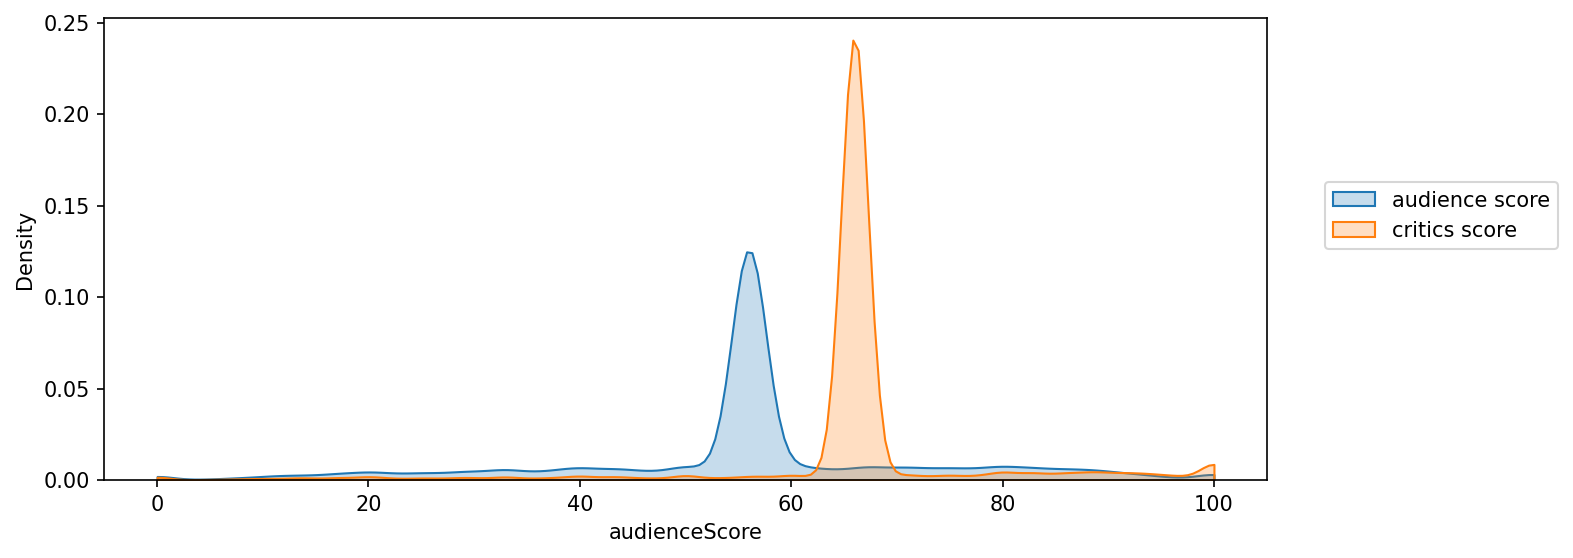

In [23]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=df,x='audienceScore',clip=[0,100],fill=True,label='audience score')
sns.kdeplot(data=df,x='tomatoMeter',clip=[0,100],fill=True,label='critics score')

plt.legend(loc=(1.05,0.5))

The graph suggests that while critics tend to rate movies around a similar score (around 60), audiences have a wider range of opinions, though they also tend to cluster around the same score. This reinforces the idea that critics' ratings are more consistent, while audience ratings are more variable.

In [24]:
df['rating_diff'] = (df['audienceScore'] - df['tomatoMeter']).abs().round(2)
df

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,releaseYearTheaters,releaseYearStreaming,rating_diff
0,space-zombie-bingo,Space Zombie Bingo!,50.0,66.0,PG-13,not described,not released in theatres,2018-08-25 00:00:00,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",0,not distributer,not mixed,NaN,2018.0,16.0
1,the_green_grass,The Green Grass,56.0,66.0,PG-13,not described,not released in theatres,2020-02-11 00:00:00,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,0,not distributer,not mixed,NaN,2020.0,10.0
2,love_lies,"Love, Lies",43.0,66.0,PG-13,not described,not released in theatres,not released for streaming,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0,not distributer,not mixed,NaN,NaN,23.0
3,the_sore_losers_1997,Sore Losers,60.0,66.0,PG-13,not described,not released in theatres,2020-10-23 00:00:00,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,0,not distributer,not mixed,NaN,2020.0,6.0
4,dinosaur_island_2002,Dinosaur Island,70.0,66.0,PG-13,not described,not released in theatres,2017-03-27 00:00:00,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,0,not distributer,not mixed,NaN,2017.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143253,nadia_the_secret_of_blue_water_the_motion_pict...,Nadia: The Secret of Blue Water: The Motion Pi...,14.0,66.0,PG-13,not described,2002-08-27 00:00:00,not released for streaming,90.0,"Action, Adventure, Anime",Japanese,Sho Aono,Kaoru Umeno,0,ADV Films,not mixed,2002.0,NaN,52.0
143254,everyone_i_knew_and_loved,Everyone I Knew and Loved,56.0,66.0,PG-13,not described,not released in theatres,not released for streaming,99.0,Drama,English,Andrew Behringer,Erika Heidewald,0,not distributer,not mixed,NaN,NaN,10.0
143255,the-human-body,The Human Body,71.0,89.0,PG-13,not described,not released in theatres,not released for streaming,43.0,Documentary,English,Peter Georgi,Richard Dale,0,not distributer,not mixed,NaN,NaN,18.0
143256,flying_fists,Flying Fists,56.0,66.0,PG-13,not described,not released in theatres,2006-11-21 00:00:00,63.0,Drama,English,Robert F. Hill,"Robert F. Hill,Basil Dickey",0,not distributer,not mixed,NaN,2006.0,10.0


Text(0.5, 1.0, 'audience score vs critic score')

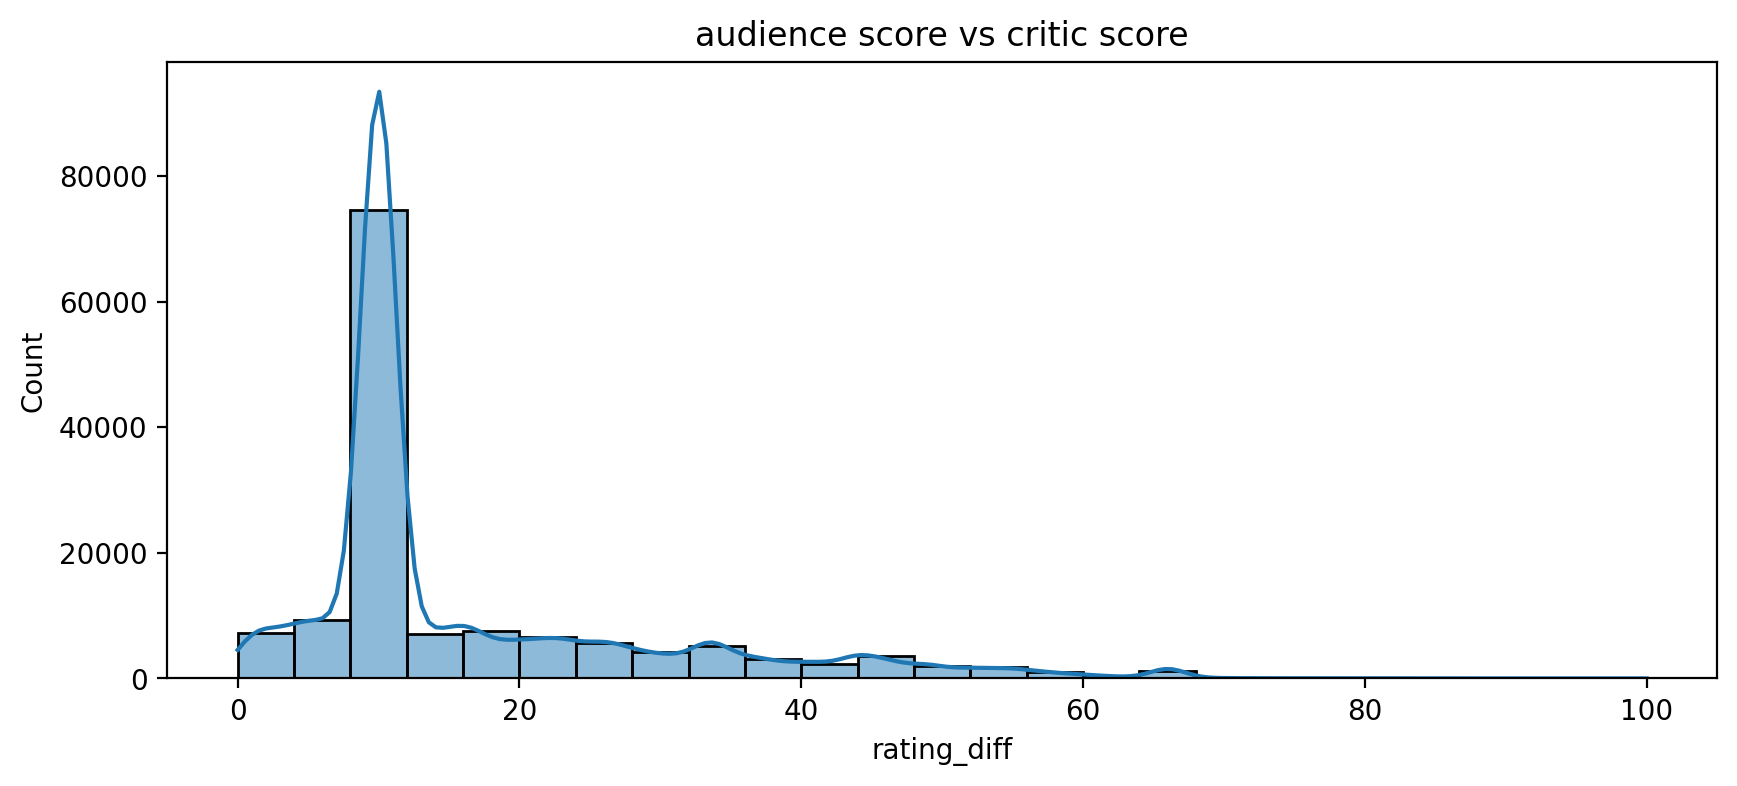

In [25]:

plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='rating_diff',kde=True,bins=25)
plt.title("audience score vs critic score")

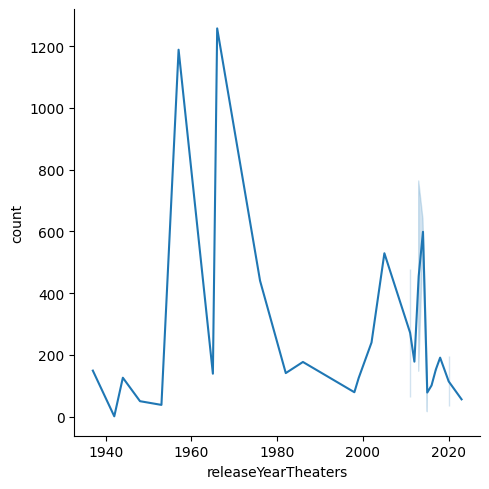

In [26]:
sns.relplot(data=df, x="releaseYearTheaters", y=movie_counts, kind="line")

In [27]:
def extract_boxofficeValue(str_val):
    if str_val.isdigit():
        return 0
    elif str_val[0] == '$':
        if str_val[-1] =='M':
            val = float(str_val[1:-1]) * 1000000
            return val
        else:
            val = float(str_val[1:-1]) *1000
            return val

In [28]:
#extract the actual values of boxoffice column
df['boxOff_values'] = df['boxOffice'].apply(extract_boxofficeValue)

In [29]:
#list the top 10 grossing boxoffice hits
df.nlargest(10,'boxOff_values')

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,releaseYearTheaters,releaseYearStreaming,rating_diff,boxOff_values
107161,avengers_endgame,Avengers: Endgame,90.0,94.0,PG-13,"['Sequences of Sci-Fi Violence', 'Action', 'So...",2019-04-26 00:00:00,2019-07-30 00:00:00,181.0,"Action, Adventure, Fantasy, Sci-fi",English,"Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely",$858.4M,Walt Disney,"Dolby Atmos, DTS, SDDS, Dolby Digital",2019.0,2019.0,4.0,858400000.0
142286,spider_man_no_way_home,Spider-Man: No Way Home,98.0,93.0,PG-13,"['Sequences of Action/Violence', 'Brief Sugges...",2021-12-17 00:00:00,not released for streaming,148.0,"Action, Adventure, Fantasy, Comedy",English,Jon Watts,"Chris McKenna,Erik Sommers",$814.1M,Columbia Pictures,"Dolby Atmos, Dolby Digital",2021.0,NaN,5.0,814100000.0
71130,top_gun_maverick,Top Gun: Maverick,99.0,96.0,PG-13,"['Some Strong Language', 'Sequences of Intense...",2022-05-27 00:00:00,2022-08-22 00:00:00,131.0,"Action, Adventure",English,Joseph Kosinski,"Ehren Kruger,Eric Warren Singer,Christopher Mc...",$718.5M,Paramount Pictures,Dolby Atmos,2022.0,2022.0,3.0,718500000.0
18834,confess_fletch,"Confess, Fletch",75.0,86.0,R,"['Some Sexual Content', 'Language', 'Drug Use']",2022-09-16 00:00:00,2022-09-16 00:00:00,98.0,"Comedy, Mystery & thriller",English,Greg Mottola,"Greg Mottola,Zev Borow",$711.6M,Miramax Films,not mixed,2022.0,2022.0,11.0,711600000.0
40710,black_panther_2018,Black Panther,79.0,96.0,PG-13,"['Sequences of Action Violence', 'A Brief Rude...",2018-02-16 00:00:00,2018-05-02 00:00:00,134.0,"Action, Adventure, Fantasy",English,Ryan Coogler,"Ryan Coogler,Joe Robert Cole",$700.2M,Walt Disney,"DTS, Dolby Atmos",2018.0,2018.0,17.0,700200000.0
104245,avengers_infinity_war,Avengers: Infinity War,92.0,85.0,PG-13,"['Intense Sci-Fi Violence', 'Action Throughout...",2018-04-27 00:00:00,2018-08-14 00:00:00,149.0,"Action, Adventure, Fantasy, Sci-fi",English,"Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely",$678.8M,Walt Disney,"Dolby Atmos, Dolby Digital, DTS",2018.0,2018.0,7.0,678800000.0
85225,avatar_the_way_of_water,Avatar: The Way of Water,92.0,76.0,PG-13,"['Partial Nudity', 'Intense Action', 'Sequence...",2022-12-16 00:00:00,2023-03-28 00:00:00,192.0,"Sci-fi, Adventure, Action, Fantasy",English,James Cameron,"James Cameron,Rick Jaffa,Amanda Silver",$678.3M,20th Century Studios,Dolby Atmos,2022.0,2023.0,16.0,678300000.0
134058,titanic,Titanic,69.0,88.0,PG-13,"['Disaster Related Peril', 'Brief Language', '...",1997-12-19 00:00:00,2002-01-08 00:00:00,195.0,"History, Drama, Romance",English,James Cameron,James Cameron,$658.8M,"20th Century Fox, Paramount Pictures","Dolby Digital, Dolby SR, Dolby Stereo, Surroun...",1997.0,2002.0,19.0,658800000.0
60631,jurassic_world,Jurassic World,78.0,71.0,PG-13,"['Peril', 'Intense Sci-Fi Violence']",2015-06-12 00:00:00,2015-10-20 00:00:00,124.0,"Adventure, Action, Sci-fi, Mystery & thriller",English,Colin Trevorrow,"Rick Jaffa,Amanda Silver,Derek Connolly,Colin ...",$652.6M,Universal Pictures,"Datasat, Dolby Digital",2015.0,2015.0,7.0,652600000.0
82701,star_wars_the_last_jedi,Star Wars: The Last Jedi,42.0,91.0,PG-13,"['Violence', 'Sequences of Sci-Fi Action']",2017-12-15 00:00:00,2018-03-27 00:00:00,152.0,"Sci-fi, Adventure, Action, Fantasy",English,Rian Johnson,Rian Johnson,$620.2M,Walt Disney,"Dolby Digital, Dolby Atmos, DTS",2017.0,2018.0,49.0,620200000.0


In [30]:
#list the 10 lowest grossing boxoffice movies
df.nsmallest(10,'boxOff_values')

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,releaseYearTheaters,releaseYearStreaming,rating_diff,boxOff_values
0,space-zombie-bingo,Space Zombie Bingo!,50.0,66.0,PG-13,not described,not released in theatres,2018-08-25 00:00:00,75.000000,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",0,not distributer,not mixed,NaN,2018.0,16.0,0.0
1,the_green_grass,The Green Grass,56.0,66.0,PG-13,not described,not released in theatres,2020-02-11 00:00:00,114.000000,Drama,English,Tiffany Edwards,Tiffany Edwards,0,not distributer,not mixed,NaN,2020.0,10.0,0.0
2,love_lies,"Love, Lies",43.0,66.0,PG-13,not described,not released in theatres,not released for streaming,120.000000,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0,not distributer,not mixed,NaN,NaN,23.0,0.0
3,the_sore_losers_1997,Sore Losers,60.0,66.0,PG-13,not described,not released in theatres,2020-10-23 00:00:00,90.000000,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,0,not distributer,not mixed,NaN,2020.0,6.0,0.0
4,dinosaur_island_2002,Dinosaur Island,70.0,66.0,PG-13,not described,not released in theatres,2017-03-27 00:00:00,80.000000,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,0,not distributer,not mixed,NaN,2017.0,4.0,0.0
6,malta-con-huevo-scrambled-beer,Scrambled Beer,55.0,66.0,PG-13,not described,not released in theatres,2015-10-05 00:00:00,88.000000,Comedy,Spanish,Cristobal Valderrama,Cristobal Valderrama,0,not distributer,not mixed,NaN,2015.0,11.0,0.0
7,kakabakaba-ka-ba,Kakabakaba ka ba? (Will Your Heart Beat Faster?),88.0,66.0,PG-13,not described,not released in theatres,not released for streaming,93.708578,genre not listed,original language not listed,Mike de Leon,writer(s) not listed,0,not distributer,not mixed,NaN,NaN,22.0,0.0
8,sundowning,Sundowning,56.0,66.0,PG-13,not described,not released in theatres,not released for streaming,123.000000,Drama,English,Jim Comas Cole,writer(s) not listed,0,not distributer,not mixed,NaN,NaN,10.0,0.0
9,1035316-born_to_kill,Born to Kill,74.0,83.0,PG-13,not described,1947-04-30 00:00:00,2016-05-23 00:00:00,92.000000,"Crime, Drama",English,Robert Wise,"Eve Greene,Richard Macaulay",0,not distributer,not mixed,1947.0,2016.0,9.0,0.0
10,1015331-number_one_with_a_bullet,Number One With a Bullet,19.0,66.0,PG-13,not described,not released in theatres,2012-03-13 00:00:00,103.000000,"Crime, Drama",English,Jack Smight,writer(s) not listed,0,not distributer,not mixed,NaN,2012.0,47.0,0.0


In [31]:
# 5 most popular genres
remove_not_listed = df[df['genre'] != 'genre not listed']
pop_genres = remove_not_listed['genre'].value_counts().sort_values(ascending=False)
pop_genres.head(5)

genre
Drama                 27860
Documentary           15162
Comedy                11514
Mystery & thriller     7015
Comedy, Drama          5479
Name: count, dtype: int64

In [32]:
#average runtime of movies in minutes
mean_runtime = df['runtimeMinutes'].mean()
print(mean_runtime)

93.70857831585941


In [33]:
#extract directors in director column and return a list of lists of directors
def extract_directors(directors):
    output_arr= []
    
    directors_arr = directors.split(",")
    for d in directors_arr:
        d = d.strip().lower()
        output_arr.append(d)
    return output_arr

In [34]:
directors = df['director'].apply(extract_directors)

In [35]:
#create dictionary which maps directors name to count in a dictionary
def directors_dict(dir_list):
    direct_count = {}
    for arr in dir_list:
        for director in arr:
            if director in direct_count:
                direct_count[director] +=1
            else:
                direct_count[director] =1
    return direct_count

In [36]:

dir_dict = directors_dict(directors)
print(dir_dict)

{'george ormrod': 1, 'tiffany edwards': 1, 'park heung-sik': 2, 'heung-sik park': 4, 'john michael mccarthy': 3, 'will meugniot': 7, 'baltasar kormákur': 13, 'cristobal valderrama': 1, 'mike de leon': 3, 'jim comas cole': 2, 'robert wise': 41, 'jack smight': 19, 'edwin l. marin': 36, 'ilya chaiken': 2, 'alexandre o. philippe': 9, 'peque gallaga': 8, 'lore reyes': 7, 'yash chopra': 20, 'michael powell': 34, 'r. balki': 6, 'leyla bouzid': 3, 'sidney lanfield': 27, 'nick broomfield': 25, 'joan churchill': 6, 'volker schlöndorff': 25, 'don siegel': 34, 'katherine stenholm': 1, 'david steinberg': 6, 'james dearden': 5, 'jong-kwan kwon': 3, 'ron underwood': 15, 'henrik galeen': 2, 'terry bishop': 5, 'katsuhide motoki': 6, 'daniel gordon': 7, 'v.z. durai': 2, 'fred newmeyer': 15, 'jim del conte': 1, 'daniel hornberger': 1, 'alec carlen': 1, 'doug campbell': 38, 'arthur hiller': 30, 'ryan perez': 1, 'david i. strasser': 15, 'olallo rubio': 3, 'tom parkinson': 1, 'nicolas benamou': 5, 'li-li li

In [37]:
#create df with directors and the number of movies they have directed
directors_df = pd.DataFrame(list(dir_dict.items()), columns=['Director', 'Count'])

#filter for actual directors
remove_unknowns = (directors_df['Director'] != 'director(s) not listed') & (directors_df['Director'] != 'unknown director')
directors_df_filtered = directors_df[remove_unknowns].sort_values(by='Count',ascending=False)

#list directors which have directed the most movies 
directors_df_filtered.head(10)

,Director,Count
1131,david decoteau,135
5688,sam newfield,126
846,fred olen ray,95
736,michael curtiz,85
1547,joseph kane,85
5286,lesley selander,82
2584,richard thorpe,80
1791,john ford,74
2783,raoul walsh,69
441,cheh chang,68


In [38]:

gross_directors = df.groupby(['director'])['boxOff_values'].sum()
gross_directors = gross_directors.sort_values(ascending=False)
gross_directors.head(10)

director
Steven Spielberg           4.073800e+09
Michael Bay                2.346300e+09
Anthony Russo,Joe Russo    2.280934e+09
Peter Jackson              2.150912e+09
Ron Howard                 2.013800e+09
Sam Raimi                  1.928600e+09
David Yates                1.885800e+09
Tim Burton                 1.819600e+09
Chris Columbus             1.707000e+09
Ridley Scott               1.687700e+09
Name: boxOff_values, dtype: float64

## Predict Audience Score 


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         143258 non-null  float64
 3   tomatoMeter           143258 non-null  float64
 4   rating                143258 non-null  object 
 5   ratingContents        143258 non-null  object 
 6   releaseDateTheaters   143258 non-null  object 
 7   releaseDateStreaming  143258 non-null  object 
 8   runtimeMinutes        143258 non-null  float64
 9   genre                 143258 non-null  object 
 10  originalLanguage      143258 non-null  object 
 11  director              143258 non-null  object 
 12  writer                143258 non-null  object 
 13  boxOffice             143258 non-null  object 
 14  distributor           143258 non-null  object 
 15  

In [40]:
released_in_theaters = df['releaseDateTheaters'] !='not released in theatres'
cinema_df = df[released_in_theaters]

X = cinema_df[['boxOff_values','runtimeMinutes']]
y = cinema_df['audienceScore']
print(X)

        boxOff_values  runtimeMinutes
5          31400000.0           120.0
9                 0.0            92.0
12            11500.0            98.0
17           199200.0           133.0
20            10500.0            90.0
...               ...             ...
143214            0.0            92.0
143239            0.0            88.0
143247        55900.0            87.0
143250      9400000.0            86.0
143253            0.0            90.0

[30773 rows x 2 columns]


In [41]:
print(X)



        boxOff_values  runtimeMinutes
5          31400000.0           120.0
9                 0.0            92.0
12            11500.0            98.0
17           199200.0           133.0
20            10500.0            90.0
...               ...             ...
143214            0.0            92.0
143239            0.0            88.0
143247        55900.0            87.0
143250      9400000.0            86.0
143253            0.0            90.0

[30773 rows x 2 columns]


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
print(y_pred.reshape(len(y_pred),1))

[[59.01811941]
 [59.35256633]
 [63.03148235]
 ...
 [60.1886836 ]
 [60.1886836 ]
 [58.51644905]]


# Conclusion
Moderate Correlation: There is a weak to moderate correlation between audience and critic scores, meaning that while there is some level of agreement, it is not strong. Both groups may often agree on whether a movie is generally good or bad, but the degree of that agreement varies significantly.

Critics' Scores are More Consistent: Critics tend to rate movies more consistently around a specific score, as shown by the sharp peak in the density plot. This suggests that critics, as a group, have more uniform criteria for evaluating movies.

Audience Scores Show Greater Variability: Audience scores are more spread out, indicating that public opinion is more diverse. This could be due to the wider range of personal tastes and preferences among the general public.

Potential Disconnect Between Critics and Audience: The plots reveal that there are movies where audience scores are high, but critic scores are low, and vice versa. This highlights that what critics appreciate in a movie may not always align with what the general audience enjoys.

Most Movies are Moderately Rated: Both audiences and critics tend to rate many movies around the mid-range (around 60), suggesting that a large portion of movies fall into a category that is neither particularly good nor bad.